In [5]:
!pip install fredapi yfinance pandas matplotlib --quiet


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


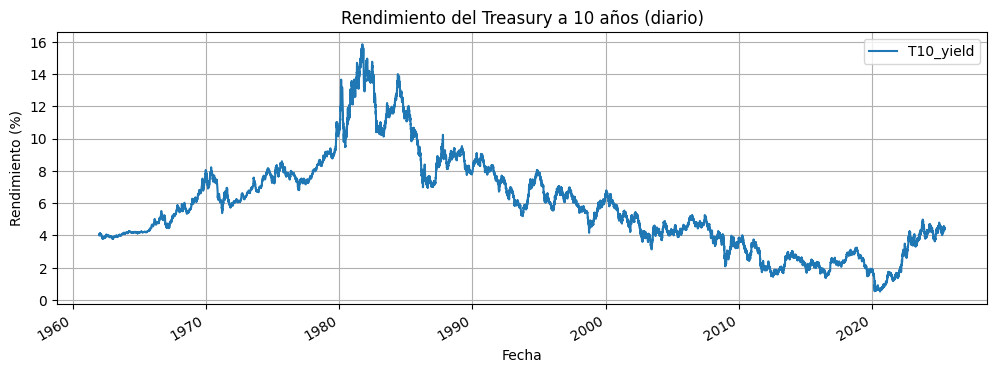

In [6]:
# ---------------------------------------------------------
# DESCARGA Y VISUALIZACIÓN DE LA TASA DEL TREASURY A 10 AÑOS (T10)
# ---------------------------------------------------------

from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# Inicialización del cliente FRED con clave API personal
fred = Fred(api_key='9b74884541c442ef0b56869ce3105d01')

# Descarga de la serie diaria correspondiente al rendimiento del bono del Tesoro de EE.UU. a 10 años (DGS10)
t10 = fred.get_series('DGS10')
t10 = t10.dropna().to_frame(name='T10_yield')
t10.index.name = 'date'

# Visualización de la evolución histórica del rendimiento del T10
t10.plot(figsize=(12, 4), title='Rendimiento del Treasury a 10 años (diario)')
plt.ylabel('Rendimiento (%)')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

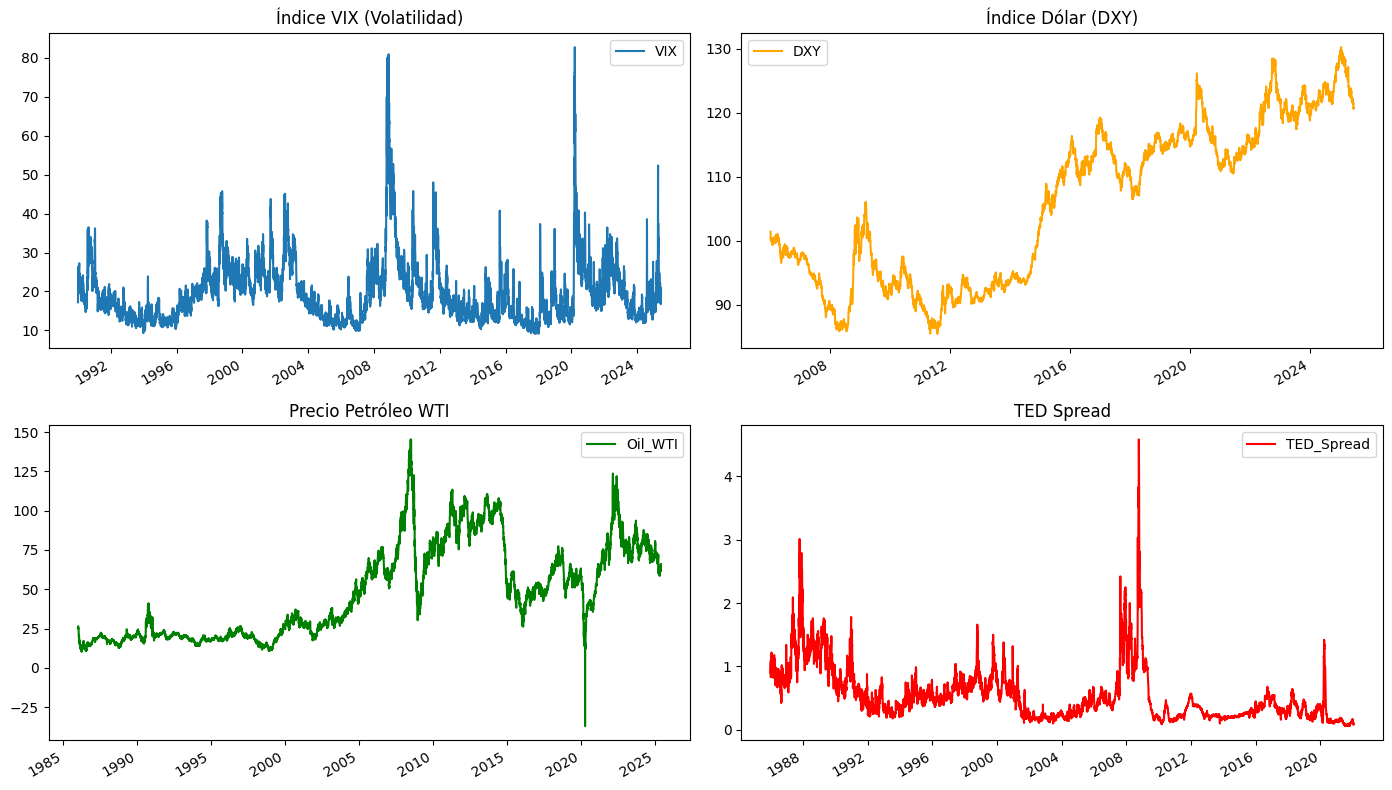

In [7]:
# ---------------------------------------------------------
# DESCARGA DE VARIABLES MACROFINANCIERAS DIARIAS
# ---------------------------------------------------------

# Descarga de variables desde FRED
vix = fred.get_series('VIXCLS').dropna().to_frame(name='VIX')
dxy = fred.get_series('DTWEXBGS').dropna().to_frame(name='DXY')
oil = fred.get_series('DCOILWTICO').dropna().to_frame(name='Oil_WTI')
ted = fred.get_series('TEDRATE').dropna().to_frame(name='TED_Spread')

# Visualización conjunta de las variables descargadas
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
vix.plot(ax=ax[0,0], title='Índice VIX (Volatilidad)')
dxy.plot(ax=ax[0,1], title='Índice Dólar (DXY)', color='orange')
oil.plot(ax=ax[1,0], title='Precio Petróleo WTI', color='green')
ted.plot(ax=ax[1,1], title='TED Spread', color='red')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1979/3820780243.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_raw = yf.download('^GSPC', start='1990-01-01', progress=False)


Columnas disponibles en el DataFrame de S&P 500:
MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])


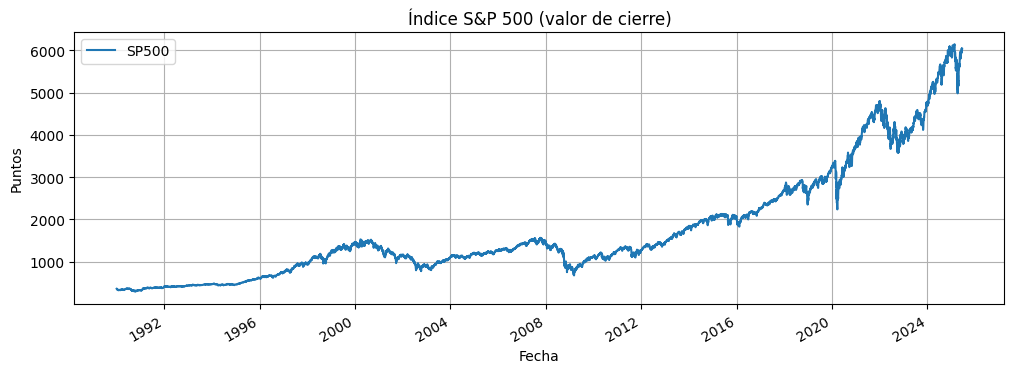

In [8]:
# ---------------------------------------------------------
# DESCARGA DEL ÍNDICE S&P 500 DESDE YAHOO FINANCE (MULTIINDEX CORREGIDO)
# ---------------------------------------------------------

import yfinance as yf

# Descarga del índice S&P 500 desde Yahoo Finance
# Alineado al resto de las variables macro utilizadas en el análisis
sp500_raw = yf.download('^GSPC', start='1990-01-01', progress=False)

# Confirmación de columnas disponibles bajo formato MultiIndex
print("Columnas disponibles en el DataFrame de S&P 500:")
print(sp500_raw.columns)

# Selección de la columna 'Close' del índice '^GSPC' utilizando acceso por tupla
sp500 = sp500_raw[('Close', '^GSPC')].dropna()
sp500.name = 'SP500'
sp500 = sp500.to_frame()

# Visualización de la evolución histórica del índice
sp500.plot(figsize=(12, 4), title='Índice S&P 500 (valor de cierre)')
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

In [9]:
# ---------------------------------------------------------
# UNIFICACIÓN DE VARIABLES Y EXPORTACIÓN DE LA SABANA FINAL
# ---------------------------------------------------------

# Lista de todas las series previamente procesadas y alineadas
series = [t10, vix, dxy, oil, ted, sp500]

# Fusión iterativa de las series usando un join tipo "inner" por índice temporal (fecha)
# Se conservan solo aquellas fechas en las que todas las variables están disponibles
df_final = series[0]
for df in series[1:]:
    df_final = df_final.join(df, how='inner')

# Verificación rápida de la estructura del DataFrame final
print("\nVista preliminar del DataFrame unificado:")
display(df_final.head())

# Información general de la muestra disponible
print(f"Número total de observaciones: {df_final.shape[0]}")
print(f"Rango de fechas: {df_final.index.min().date()} → {df_final.index.max().date()}")

# Revisión de datos faltantes (debería ser 0 si el join fue exitoso)
print("\nConteo de valores nulos por variable:")
print(df_final.isnull().sum())

# Exportación de la sabana a un archivo CSV para uso posterior
df_final.to_csv("sabana_macro_t10.csv", index=True)

print("\n✅ Sabana exportada exitosamente como 'sabana_macro_t10.csv'")


Vista preliminar del DataFrame unificado:


,T10_yield,VIX,DXY,Oil_WTI,TED_Spread,SP500
2006-01-03,4.37,11.14,100.7558,63.11,0.47,1268.800049
2006-01-04,4.36,11.37,100.2288,63.41,0.45,1273.459961
2006-01-05,4.36,11.31,100.2992,62.81,0.45,1273.479980
2006-01-06,4.38,11.00,100.0241,64.21,0.43,1285.449951
2006-01-09,4.38,11.13,100.1794,63.56,0.42,1290.150024


Número total de observaciones: 3903
Rango de fechas: 2006-01-03 → 2022-01-21

Conteo de valores nulos por variable:
T10_yield     0
VIX           0
DXY           0
Oil_WTI       0
TED_Spread    0
SP500         0
dtype: int64

✅ Sabana exportada exitosamente como 'sabana_macro_t10.csv'
